In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from io import StringIO
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import PercentFormatter
from matplotlib import colors
%matplotlib inline


In [ ]:
udf_debug_overall_csv = """
name,UDF1,UDF2,UDF3,UDF4
original,0.635,28.233,3.680,2.743
debugger,113.051,57.810,7.561,4.321
opt_1A,28.423,46.176,6.513,4.285
opt_1B,0.631,30.291,6.274,4.257
opt_2,18.036,28.687,6.208,4.332
op1B_op2,1.452,28.547,3.727,4.375
"""

In [ ]:
pdb_overhead_csv = """
num tuples	UDF1 no debugger	UDF1 with debugger	UDF2 no debugger	UDF2 with debugger	UDF3 no debugger	UDF3 with debugger
10k	9.21	31.81	215.49	413.11	8.94	19.18
20k	17.76	60.23	428.09	824.88	18.36	37.99
30k	25.86	88.74	633.44	1200.14	27.24	56.09
40k	33.87	117.2	838.13	1520.89	36.38	74.71
50k	41.81	146.13	1039.82	1838.87	45.61	93.38
60k	50.05	175.3	1225.04	2153.19	54.73	112.02
70k	58.28	204.59	1395.88	2466.58	63.70	130.70
80k	66.31	233.31	1566.60	2776.37	71.54	149.57
90k	74.4	260.7	1736.77	3083.15	80.64	168.69
100k	82.38	289.33	1904.45	3390.99	89.97	187.03
110k	90.49	317.61	2076.31	3711.61	99.09	205.99
120k	98.45	344.8	2239.33	4029.31	108.42	224.52
130k	106.43	371.57	2428.68	4340.00	117.89	243.09
140k	114.5	398.33	2595.33	4663.04	127.22	261.23
150k	122.44	425.98	2761.67	4980.79	136.69	280.29
160k	130.63	453.45	2932.16	5304.38	145.75	298.72
170k	138.82	480.86	3097.98	5627.53	154.76	317.97
180k	146.83	508.22	3265.75	5937.33	164.10	336.41
190k	154.72	536.31	3430.59	6249.50	173.20	354.58
200k	162.64	564.83	3598.04	6558.06	182.43	373.51
"""

In [ ]:
pdb_overhead = pd.read_csv(StringIO(pdb_overhead_csv), sep='\t')

Text(0.5, 0, 'number of tuples')

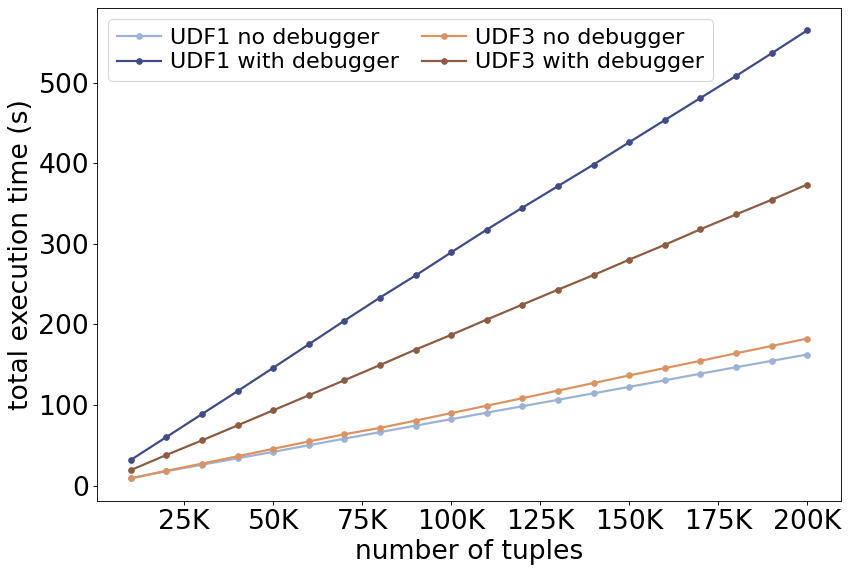

In [ ]:

overhead_x_axis = pdb_overhead["num tuples"].apply(lambda x: int(x[:-1]) * 1000)

plt.figure(figsize=(12, 8), dpi=80)

# sns.set_style("white")
plt.plot(overhead_x_axis, pdb_overhead["UDF1 no debugger"],  color='#9CB3D4', marker="o", markersize="5", label="UDF1 no debugger", linewidth="2")
plt.plot(overhead_x_axis, pdb_overhead["UDF1 with debugger"], color='#414C87',  marker="o", markersize="5", label="UDF1 with debugger", linewidth="2")
plt.plot(overhead_x_axis, pdb_overhead["UDF3 no debugger"], color='#DA9464',  marker="o", markersize="5", label="UDF3 no debugger", linewidth="2")
plt.plot(overhead_x_axis, pdb_overhead["UDF3 with debugger"], color='#8C5D42',  marker="o", markersize="5", label="UDF3 with debugger", linewidth="2")

# xlabels = ['{:,.2f}'.format(x) + 'K' for x in plt.get_xticks()/1000]

plt.xticks(fontsize=fontsize)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.yticks(fontsize=fontsize)
plt.legend(fontsize=20, ncol=2, loc='upper left', labelspacing=0.2, handletextpad=0.4, columnspacing=1)
plt.ylabel("total execution time (s)", fontsize=fontsize)
plt.xlabel("number of tuples", fontsize=fontsize)

Text(0.5, 0, 'Number of tuples')

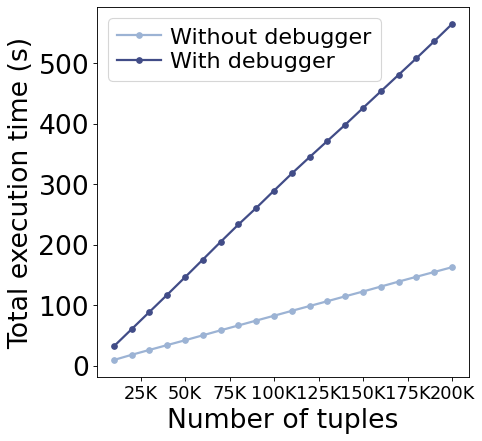

In [ ]:

overhead_x_axis = pdb_overhead["num tuples"].apply(lambda x: int(x[:-1]) * 1000)

plt.figure(figsize=(6, 6), dpi=80)

# sns.set_style("white")
plt.plot(overhead_x_axis, pdb_overhead["UDF1 no debugger"],  color='#9CB3D4', marker="o", markersize="5", label="Without debugger", linewidth="2")
plt.plot(overhead_x_axis, pdb_overhead["UDF1 with debugger"], color='#414C87',  marker="o", markersize="5", label="With debugger", linewidth="2")
# xlabels = ['{:,.2f}'.format(x) + 'K' for x in plt.get_xticks()/1000]

plt.xticks(fontsize=16)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.yticks(fontsize=fontsize)
plt.legend(fontsize=20, ncol=1, loc='upper left', labelspacing=0.2, handletextpad=0.4, columnspacing=1)
plt.ylabel("Total execution time (s)", fontsize=fontsize)
plt.xlabel("Number of tuples", fontsize=fontsize)

Text(0.5, 0, 'Number of tuples')

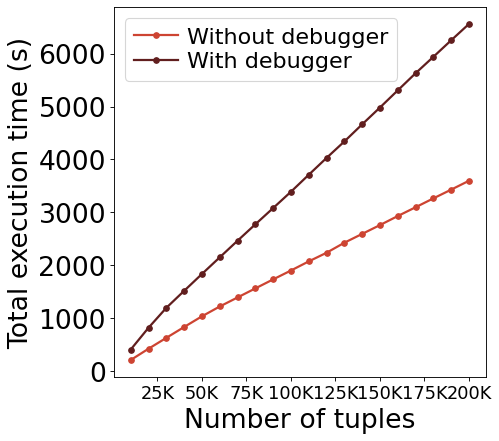

In [ ]:

overhead_x_axis = pdb_overhead["num tuples"].apply(lambda x: int(x[:-1]) * 1000)

plt.figure(figsize=(6, 6), dpi=80)

# sns.set_style("white")
plt.plot(overhead_x_axis, pdb_overhead["UDF2 no debugger"],  color='#CD4432', marker="o", markersize="5", label="Without debugger", linewidth="2")
plt.plot(overhead_x_axis, pdb_overhead["UDF2 with debugger"], color='#611E1E',  marker="o", markersize="5", label="With debugger", linewidth="2")
# xlabels = ['{:,.2f}'.format(x) + 'K' for x in plt.get_xticks()/1000]

plt.xticks(fontsize=16)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.yticks(fontsize=fontsize)
plt.legend(fontsize=20, ncol=1, loc='upper left', labelspacing=0.2, handletextpad=0.4, columnspacing=1)
plt.ylabel("Total execution time (s)", fontsize=fontsize)
plt.xlabel("Number of tuples", fontsize=fontsize)

Text(0.5, 0, 'Number of tuples')

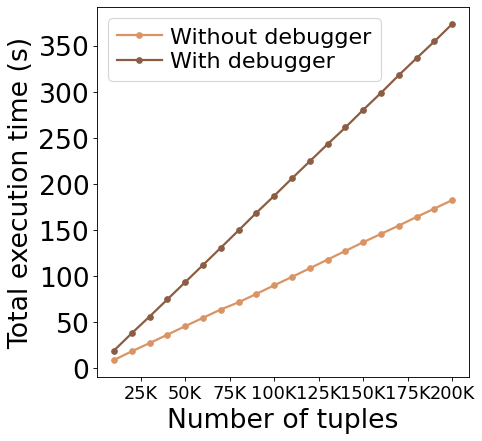

In [ ]:

overhead_x_axis = pdb_overhead["num tuples"].apply(lambda x: int(x[:-1]) * 1000)

plt.figure(figsize=(6, 6), dpi=80)

plt.plot(overhead_x_axis, pdb_overhead["UDF3 no debugger"], color='#DA9464',  marker="o", markersize="5", label="Without debugger", linewidth="2")
plt.plot(overhead_x_axis, pdb_overhead["UDF3 with debugger"], color='#8C5D42',  marker="o", markersize="5", label="With debugger", linewidth="2")

# xlabels = ['{:,.2f}'.format(x) + 'K' for x in plt.get_xticks()/1000]

plt.xticks(fontsize=16)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

plt.yticks(fontsize=fontsize)
plt.legend(fontsize=20, ncol=1, loc='upper left', labelspacing=0.2, handletextpad=0.4, columnspacing=1)
plt.ylabel("Total execution time (s)", fontsize=fontsize)
plt.xlabel("Number of tuples", fontsize=fontsize)

In [ ]:
udf_debug_compare_csv = """
name	UDF1	UDF2	UDF3
no debug	162.64	3598.04	182.43
debugger	564.83	6558.06	373.51
opt1	198.08	3749.97	181.93
opt2	344.65	6727.01	352.02
opt1+2	173.89	3926.89	181
"""

In [ ]:
udf_debug_compare = pd.read_csv(StringIO(udf_debug_compare_csv), sep='\t')
udf_debug_compare = udf_debug_compare.set_index("name")
udf_debug_compare
udf_debug_compare = udf_debug_compare.transpose()
udf_debug_compare

name,no debug,debugger,opt1,opt2,opt1+2
UDF1,162.64,564.83,198.08,344.65,173.89
UDF2,3598.04,6558.06,3749.97,6727.01,3926.89
UDF3,182.43,373.51,181.93,352.02,181.00


In [ ]:
udf_debug_compare = udf_debug_compare.div(udf_debug_compare.iloc[:,0],axis=0).mul(100).add(0.5).round()
udf_debug_compare

name,no debug,debugger,opt1,opt2,opt1+2
UDF1,100.0,348.0,122.0,212.0,107.0
UDF2,100.0,183.0,105.0,187.0,110.0
UDF3,100.0,205.0,100.0,193.0,100.0


<ipython-input-15-42f773fc5ee5>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

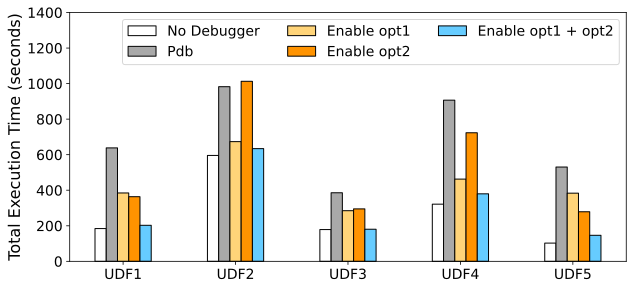

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats

# Set the output format to SVG
set_matplotlib_formats('svg')

# Set the figure size and DPI
fig, ax = plt.subplots(figsize=(10, 4.5), dpi=300)

breakpoint_checks = [283.8, 325.0, 110.2, 387.6, 156.5]
condition_evaluations = [168.2, 58.8, 94.6, 196.8,240.2]
udf_code = [184.2, 595.6, 178.8, 321.4, 102.4]

names = ['UDF1', 'UDF2', 'UDF3', 'UDF4', 'UDF5']
no_debug = [184.2, 595.6, 178.8, 321.4, 102.4]
opt0 = [638.2, 982.5, 385.7, 906.61, 530.5]
opt1 = [384.61, 673.52, 284.96, 462.74, 383.56]
opt2 = [363.52, 1012.77, 295.13, 723.24,278.99]
opt3 = [202.74, 634.12, 180.41, 379.81,146.48]

# Set the position of the bars on the x-axis
r = np.arange(len(names))

# Set the width of the bars
bar_width = 0.1

# Define the color map
color_map = ['#ffffff', '#A9A9A9', '#FFD479', '#FF9300', '#66CCFF']

# Plot the bars and store the artists
p1 = plt.bar(r, no_debug, color=color_map[0], width=bar_width, edgecolor='black')
p2 = plt.bar(r + bar_width, opt0, color=color_map[1], width=bar_width, edgecolor='black')
p3 = plt.bar(r + bar_width*2, opt1, color=color_map[2], width=bar_width, edgecolor='black')
p4 = plt.bar(r + bar_width*3, opt2, color=color_map[3], width=bar_width, edgecolor='black')
p5 = plt.bar(r + bar_width*4, opt3, color=color_map[4], width=bar_width, edgecolor='black')

# Add xticks on the middle of the group bars

plt.ylabel('Total Execution Time (seconds)', fontsize=16)
ax.set_ylim([0, 1400])
plt.yticks(fontsize = 14)
plt.xticks([r + bar_width*2 for r in range(len(names))], names, fontsize=14)

# Define the legend explicitly
plt.legend((p1, p2, p3, p4, p5), ('No Debugger', 'Pdb', 'Enable opt1', 'Enable opt2', 'Enable opt1 + opt2'),ncol=3, fontsize=14)

# Show the chart
from google.colab import files
plt.savefig("compare-optimizations.png")
files.download("compare-optimizations.png")


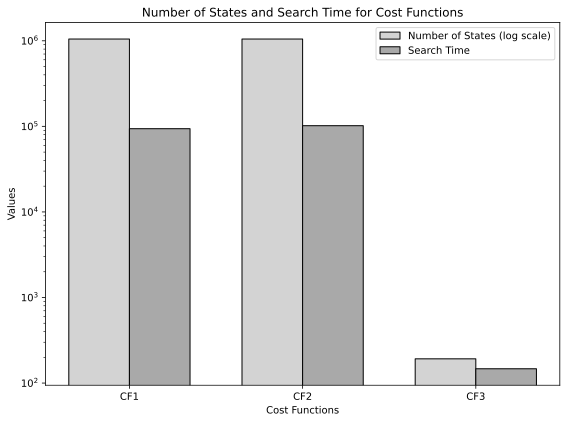

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

cost_functions = ['CF1', 'CF2', 'CF3']
num_states = [1048576, 1048576, 192]
search_time = [93924, 101822, 147]

# Define the width of the bars
bar_width = 0.35

# Set the positions for the bars
r1 = np.arange(len(cost_functions))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(8, 6))

plt.bar(r1, num_states, color='lightgray', width=bar_width, edgecolor='black', linewidth=1, label='Number of States (log scale)')
plt.bar(r2, search_time, color='darkgray', width=bar_width, edgecolor='black', linewidth=1, label='Search Time')

plt.xlabel('Cost Functions')
plt.ylabel('Values')
plt.title('Number of States and Search Time for Cost Functions')
plt.xticks([r + bar_width / 2 for r in range(len(cost_functions))], cost_functions)
plt.yscale('log')  # Setting y-axis to log scale
plt.legend()

plt.tight_layout()
plt.show()

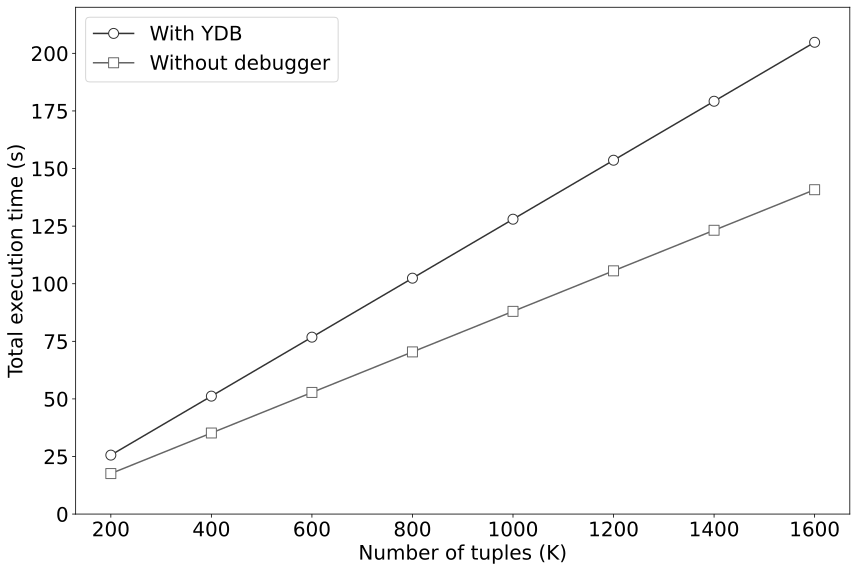

In [ ]:
import matplotlib.pyplot as plt

# Define the data
x = [200, 400, 600, 800, 1000, 1200, 1400, 1600]
y1 = [25.6, 51.2, 76.8, 102.4, 128, 153.6, 179.2, 204.8]
y2 = [17.6, 35.2, 52.8, 70.4, 88, 105.6, 123.2, 140.8]


# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define grayscale color scheme
colors = ['#333333', '#666666']

# Create the lines with data points as filled circles/triangles and rename the lines
p1, = ax.plot(x, y1, 'o-', markersize=10, color=colors[0], label='With YDB', markerfacecolor='white')
p2, = ax.plot(x, y2, 's-', markersize=10, color=colors[1], label='Without debugger', markerfacecolor='white')

# Add labels, title, and legend
ax.set_xlabel('Number of tuples (K)', fontsize=20)
ax.set_ylabel('Total execution time (s)', fontsize=20)
ax.legend(fontsize=20)

# Set x and y axis labels font size
ax.tick_params(axis='both', labelsize=20)

# Set y-axis limit to 220
ax.set_ylim([0, 220])

# Show the plot
plt.tight_layout()
plt.show()

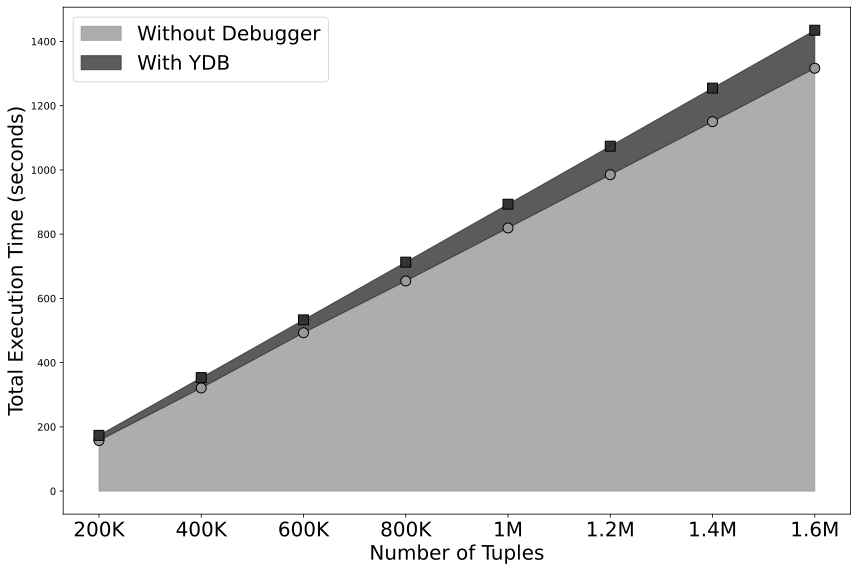

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
without_debugger = [157.26, 321.19, 493.04, 654.17, 819.28, 985.04, 1150.21, 1316.61]
with_ydb = [173.49, 353.22, 533.05, 712.89, 893.26, 1073.95, 1254.72, 1434.92]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the x locations and width of the bars
x = np.arange(len(without_debugger))

# Define the colors
colors = ['#999999', '#333333']

# Create the stacked area chart
p1 = ax.fill_between(x, without_debugger, color=colors[0], alpha=0.8)
p2 = ax.fill_between(x, without_debugger, with_ydb, color=colors[1], alpha=0.8)

# Add data points
markersize = 10
ax.plot(x, without_debugger, marker='o', markersize=markersize, linestyle='None', color=colors[0], markeredgecolor='black')
ax.plot(x, with_ydb, marker='s', markersize=markersize, linestyle='None', color=colors[1], markeredgecolor='black')

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=20)
ax.set_xlabel('Number of Tuples', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(['200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'], fontsize=20)
ax.legend((p1, p2), ('Without Debugger', 'With YDB'), loc='upper left', fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-20-4217cdfab0ee>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0', '200', '400', '600', '800', '1000', '1200', '1400'], fontsize = 20)


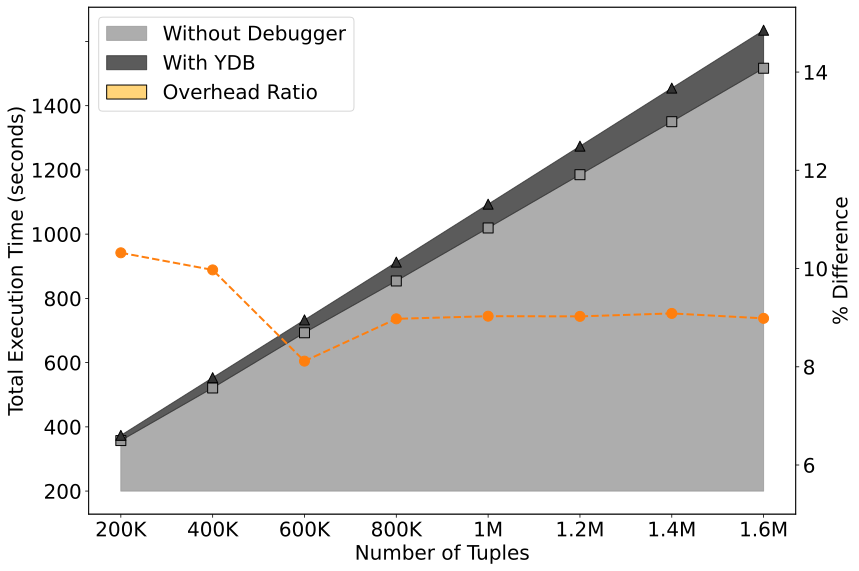

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
without_debugger = [157.26, 321.19, 493.04, 654.17, 819.28, 985.04, 1150.21, 1316.61]
with_ydb = [173.49, 353.22, 533.05, 712.89, 893.26, 1073.95, 1254.72, 1434.92]

# Calculate percentage difference
diff_percentage = [(y - x) / x * 100 for x, y in zip(without_debugger, with_ydb)]

# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 8), dpi=80)

# Define the x locations and width of the bars
x = np.arange(len(without_debugger))

# Define the colors
colors = ['#999999', '#333333', '#ff7f0e']

# Create the stacked area chart
p1 = ax1.fill_between(x, without_debugger, color=colors[0], alpha=0.8)
p2 = ax1.fill_between(x, without_debugger, with_ydb, color=colors[1], alpha=0.8)

# Add data points
markersize = 10
ax1.plot(x, without_debugger, marker='s', markersize=markersize, linestyle='None', color=colors[0], markeredgecolor='black')
ax1.plot(x, with_ydb, marker='^', markersize=markersize, linestyle='None', color=colors[1], markeredgecolor='black')

# Add labels, title, and legend for the left y-axis
ax1.set_ylabel('Total Execution Time (seconds)', fontsize=20)
ax1.set_yticklabels(['0', '200', '400', '600', '800', '1000', '1200', '1400'], fontsize = 20)
ax1.set_xlabel('Number of Tuples', fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(['200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'], fontsize=20)
ax1.legend((p1, p2, p3), ('Without Debugger', 'With YDB', 'Overhead Ratio'), loc='upper left', fontsize=20)

# Add percentage difference line and legend for the right y-axis
ax2 = ax1.twinx()
p3, = ax2.plot(x, diff_percentage,linewidth=2, marker='o', markersize=markersize, linestyle='--', color=colors[2])
ax2.set_ylabel('% Difference', fontsize=20)
ax2.set_ylim([5, max(diff_percentage) + 5])
ax2.tick_params(axis='y', labelsize=20)
# ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-21-9ebe9ab59b2f>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


[10.320488363220157, 9.97229054453751, 8.11496024663312, 8.976259993579655, 9.029879894541551, 9.026029399821335, 9.086166873875204, 8.985956357615404]


<ipython-input-21-9ebe9ab59b2f>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '', '400', '','800', '', '1200', '', '1600'], fontsize=14)
<ipython-input-21-9ebe9ab59b2f>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0.0', '', '5.0', '', '10.0', '', '15.0', '', '20.0'], fontsize=14)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

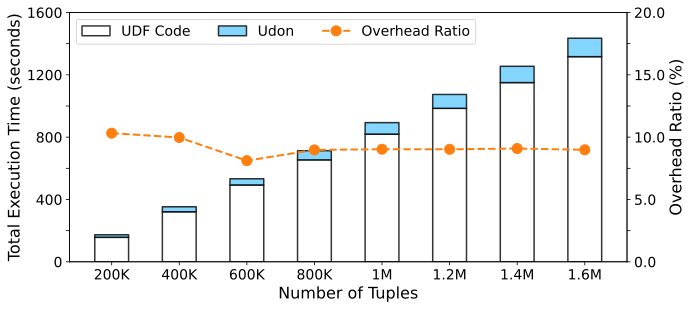

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
# Define the data
without_debugger = [157.26, 321.19, 493.04, 654.17, 819.28, 985.04, 1150.21, 1316.61]
with_ydb = [173.49, 353.22, 533.05, 712.89, 893.26, 1073.95, 1254.72, 1434.92]
diff_percentage = [(y - x) / x * 100 for x, y in zip(without_debugger, with_ydb)]
print(diff_percentage)
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4.5), dpi=300)

# Define the x locations and width of the bars
x = np.arange(len(without_debugger))
width = 0.5

# Define the colors
# colors = ['#DCEEF3', '#005CAB', '#FFC325']
colors = ['#999999', '#66CCFF', '#ff7f0e']

# Create the stacked bar chart
bottom = np.zeros(len(without_debugger))
p1 = ax.bar(x, without_debugger, width, color='white', edgecolor='black', linewidth=1.5, alpha=0.8)
p2 = ax.bar(x, np.array(with_ydb) - np.array(without_debugger), width, bottom=without_debugger, color=colors[1], edgecolor='black', linewidth=1.5,alpha=0.8)

# Add data points
markersize = 10
ax.plot(x, without_debugger, markersize=markersize, linestyle='None', color=colors[0], markeredgecolor='black')
ax.plot(x, with_ydb, markersize=markersize, linestyle='None', color=colors[1], markeredgecolor='black')

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=16)
ax.set_yticklabels(['0', '', '400', '','800', '', '1200', '', '1600'], fontsize=14)
ax.set_xlabel('Number of Tuples', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(['200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M', '1.6M'], fontsize=14)

ax.set_ylim([0, 1600])
# Add percentage difference line and legend
ax2 = ax.twinx()
p3 = ax2.plot(x, diff_percentage, linewidth=2, marker='o', markersize=markersize, linestyle='--', color=colors[2])
ax2.set_ylabel('Overhead Ratio (%)', fontsize=16)
ax2.set_ylim([0, 20])
ax2.set_yticklabels(['0.0', '', '5.0', '', '10.0', '', '15.0', '', '20.0'], fontsize=14)
ax.legend((p1[0], p2[0], p3[0]), ('UDF Code', 'Udon', 'Overhead Ratio'), loc='upper left', fontsize=14, ncol=3)
# plt.show()

from google.colab import files
plt.savefig("scale-up.png")
files.download("scale-up.png")



<ipython-input-22-e0ae20f342dc>:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


[8.976259993579655, 8.070175438596488, 6.749413632854048, 6.699794874758039, 6.213203932372142, 6.056385112547362, 6.1216545012165415, 6.039524377061438]


<ipython-input-22-e0ae20f342dc>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['0','200', '400', '600', '800', '1000'], fontsize= 14)
<ipython-input-22-e0ae20f342dc>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0.0', '', '4.0', '', '8.0', '', '12.0', '', '16.0'], fontsize=14)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

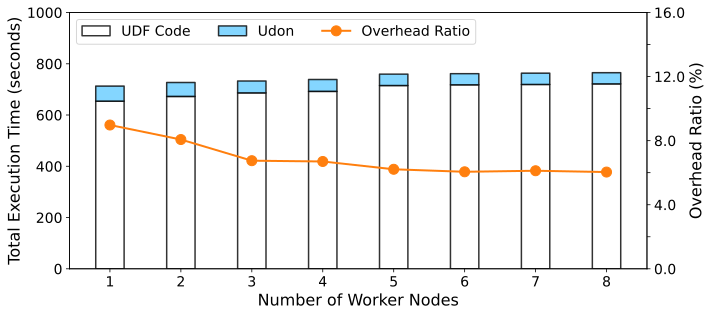

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
# Define the data
workers = [1, 2, 3, 4, 5, 6, 7, 8]
with_ydb =          [712.89, 726.88, 732.76, 738.64, 759.52, 761.40, 763.28, 765.16]
without_debugger =  [654.17, 672.60, 686.43, 692.26, 715.09, 717.92, 719.25, 721.58]
diff = [(with_ydb[i]-without_debugger[i])/without_debugger[i]*100 for i in range(len(with_ydb))]
print(diff)
# Set up the plot
fig, ax1 = plt.subplots(figsize=(10, 4.5), dpi=300)
ax2 = ax1.twinx()

# Define the x locations and width of the bars
x = np.arange(len(with_ydb))
width = 0.4

# Define the colors
colors = ['#999999', '#66CCFF', '#ff7f0e']

# Create the bar chart
p1 = ax1.bar(x, without_debugger, width, color='white', edgecolor='black', linewidth=1.5, alpha=0.8)
p2 = ax1.bar(x, np.array(with_ydb) - np.array(without_debugger), width, bottom=without_debugger, color=colors[1], edgecolor='black', linewidth=1.5,alpha=0.8)


# Create the line chart
p3, = ax2.plot(x, diff, color=colors[2], linewidth=2, marker='o', markersize=10)

# Add labels, title, and legend
ax1.set_ylabel('Total Execution Time (seconds)', fontsize=16)
ax1.set_yticklabels(['0','200', '400', '600', '800', '1000'], fontsize= 14)
ax1.set_xlabel('Number of Worker Nodes', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8'], fontsize=14)
# ax1.legend(['Without Debugger', 'With YDB'], fontsize=20)
ax1.set_ylim([0, 1000])
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax2.set_ylabel('Overhead Ratio (%)', fontsize=16)
ax2.set_ylim([0.0, 16.0])
ax2.set_yticklabels(['0.0', '', '4.0', '', '8.0', '', '12.0', '', '16.0'], fontsize=14)
ax2.yaxis.set_tick_params(labelsize=14)
# ax2.legend(['% Difference'], fontsize=20)
ax1.legend((p1, p2, p3), ('UDF Code', 'Udon', 'Overhead Ratio'), loc='upper left', fontsize=14, ncol=3)


# Show the plot
plt.tight_layout()
from google.colab import files
plt.savefig("scale-out.png")
files.download("scale-out.png")


<ipython-input-23-ce228fd847e1>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

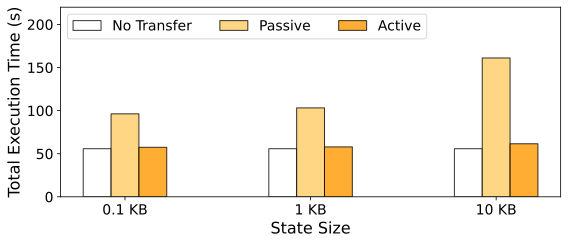

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')

# Define the data
no_transfer = [55.82, 55.82, 55.82]
passive = [96.28, 103.19, 161.06]
active = [57.42, 57.92, 61.54]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 3.5), dpi=300)

# Define the x locations and width of the bars
x = np.arange(len(no_transfer))
width = 0.15

# Define the colors
colors = ['white', '#FFCC66', '#FF9900']

# Define the patterns
patterns = ['', '', '']

# Create the bar chart
p1 = ax.bar(x, no_transfer, width, color=colors[0], edgecolor='black', hatch=patterns[0], alpha=0.8, label='No Transfer')
p2 = ax.bar(x + width, passive, width, color=colors[1], edgecolor='black', hatch=patterns[1], alpha=0.8, label='Passive')
p3 = ax.bar(x + width*2, active, width, color=colors[2], edgecolor='black', hatch=patterns[2], alpha=0.8, label='Active')

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (s)', fontsize=16)
ax.set_xlabel('State Size', fontsize=16)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xticks(x + width)
ax.set_xticklabels(['0.1 KB', '1 KB', '10 KB'], fontsize=14)
ax.set_ylim([0, 220])
ax.legend(fontsize=14,loc='upper left', ncol = 3)

# Show the plot
plt.tight_layout()
from google.colab import files
plt.savefig("passive-vs-active.png")
files.download("passive-vs-active.png")


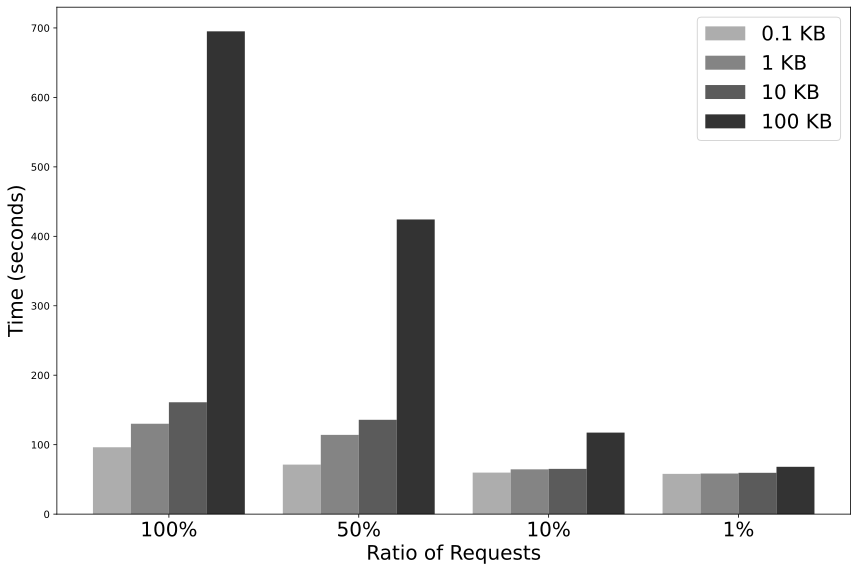

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
ratios = ['100%', '50%', '10%', '1%']
size_0_1KB = [96.28, 71.34, 59.76, 58.02]
size_1KB = [130.19, 114.09, 64.53, 58.46]
size_10KB = [161.06, 135.85, 65.21, 59.54]
size_100KB = [695.11, 424.28, 117.37, 68.15]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the x locations and width of the bars
x = np.arange(len(ratios))
width = 0.2

# Define the colors
colors = ['#999999', '#666666', '#333333', '#000000']

# Create the grouped bar chart
p1 = ax.bar(x - 1.5*width, size_0_1KB, width, color=colors[0], alpha=0.8, label='0.1 KB')
p2 = ax.bar(x - 0.5*width, size_1KB, width, color=colors[1], alpha=0.8, label='1 KB')
p3 = ax.bar(x + 0.5*width, size_10KB, width, color=colors[2], alpha=0.8, label='10 KB')
p4 = ax.bar(x + 1.5*width, size_100KB, width, color=colors[3], alpha=0.8, label='100 KB')

# Add labels, title, and legend
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_xlabel('Ratio of Requests', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ratios, fontsize=20)
ax.legend(fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-25-bffc5ede938b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sizes, fontsize=16)
<ipython-input-25-bffc5ede938b>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 200, 400, 600, 800], fontsize=16)


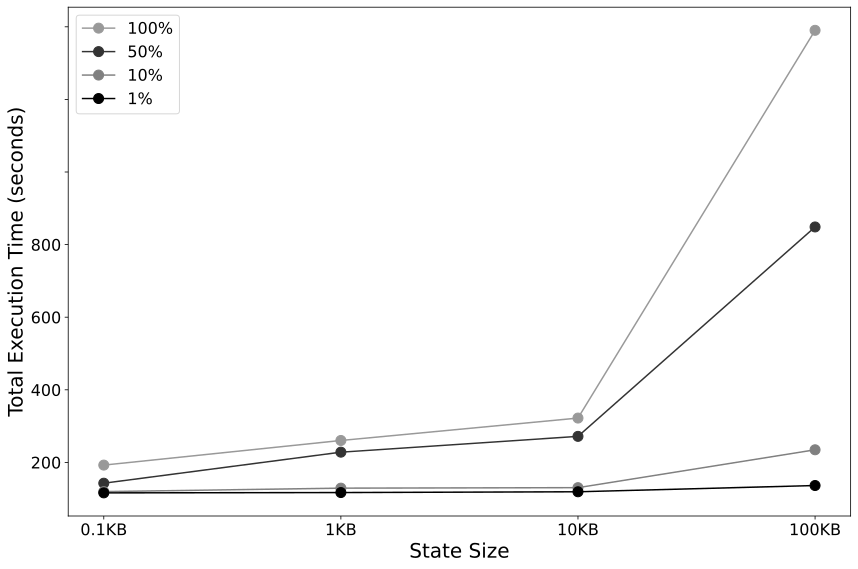

In [ ]:
import matplotlib.pyplot as plt

# Define the data
ratios = ['100%', '50%', '10%', '1%']
sizes = ['0.1KB', '1KB', '10KB', '100KB']
values = [
    [96.28, 130.19, 161.06, 695.11],
    [71.34, 114.09, 135.85, 424.28],
    [59.76, 64.53, 65.21, 117.37],
    [58.02, 58.46, 59.54, 68.15]
]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the colors
colors = ['#999999', '#333333', 'gray', 'black']

# Create the line chart for each ratio
for i in range(len(ratios)):
    ax.plot(sizes, values[i], marker='o', markersize=10, color=colors[i], label=ratios[i])

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=20)
ax.set_xlabel('State Size', fontsize=20)
ax.set_xticklabels(sizes, fontsize=16)
ax.set_yticklabels([0, 200, 400, 600, 800], fontsize=16)
ax.legend(fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()



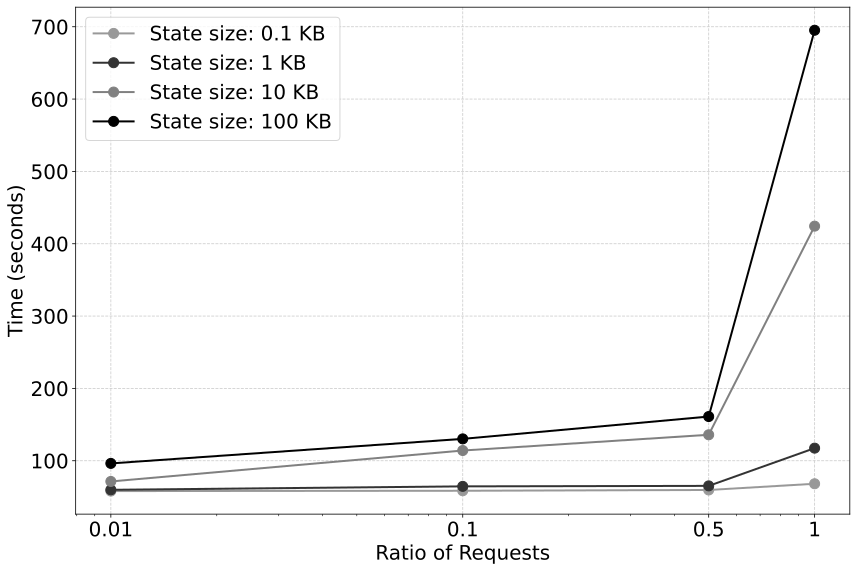

In [ ]:
import matplotlib.pyplot as plt

# Define the data
ratios = [0.01, 0.1, 0.5, 1]
sizes = [0.1, 1, 10, 100]
passive = [[58.02, 58.46, 59.54, 68.15],
           [59.76, 64.53, 65.21, 117.37],
           [71.34, 114.09, 135.85, 424.28],
           [96.28, 130.19, 161.06, 695.11]]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the colors
colors = ['#999999', '#333333', 'gray', 'black']

# Create the line chart
for i in range(len(sizes)):
    ax.plot(ratios, passive[i], marker='o', markersize=10, color=colors[i], linewidth=2,
            label='State size: {} KB'.format(sizes[i]))

# Add labels, title, and legend
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_xlabel('Ratio of Requests', fontsize=20)
ax.set_xscale('log')
ax.set_xticks(ratios)
ax.set_xticklabels(['0.01', '0.1', '0.5', '1'], fontsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)

# Add grid lines
ax.grid(True, which='major', axis='both', linestyle='--', color='#cccccc')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
ratios = [0.01, 0.1, 0.5, 1]
state_sizes = [0.1, 1, 10]
passive = [[58.02, 58.46, 59.54],
           [59.76, 64.53, 65.21],
           [71.34, 114.09, 135.85],
           [96.28, 130.19, 161.06]]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the colors
colors = ['#999999', '#333333', '#666666', '#bbbbbb']

# Create the line chart
for i in range(len(ratios)):
    ax.plot(state_sizes, passive[i], marker='o', markersize=10, color=colors[i], label=str(int(ratios[i]*100))+'%')

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=20)
ax.set_xlabel('State Size (KB)', fontsize=20)
# ax.set_xscale('log')
ax.set_xticks(state_sizes)
ax.set_xticklabels(state_sizes, fontsize=20)
ax.set_yticks(np.arange(0, 800, 100))
ax.set_yticklabels(np.arange(0, 800, 100), fontsize=20)
ax.legend(fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the data
ratios = [0.01, 0.1, 0.5, 0.75, 1]
sizes = [0.1, 1, 10, 100]
passive = [[58.02, 58.46, 59.54, 68.15],
           [59.76, 64.53, 65.21, 117.37],
           [71.34, 114.09, 135.85, 424.28],
           [81.88, 122.32, 147.37, 528.92],
           [96.28, 130.19, 161.06, 695.11]]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the colors
colors = ['#999999', '#333333', 'gray', 'black', 'orange']

# Create the line chart
for i in range(len(sizes)):
    ax.plot(ratios, [r[i] for r in passive], marker='o', markersize=10, color=colors[i], linewidth=2,
            label='State size: {} KB'.format(sizes[i]))

# Add labels, title, and legend
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_xlabel('Ratio of Requests', fontsize=20)
ax.set_xticks(ratios)
ax.set_xticklabels(['0.01', '0.1', '0.5', '0.75', '1'], fontsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)

# Add grid lines
ax.grid(True, which='major', axis='both', linestyle='--', color='#cccccc')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')

# Define the data
ratios = [0.01, 0.1, 0.5, 0.75, 1]
sizes = [0.1, 1, 10]
passive = [[58.02, 58.46, 59.54],
           [59.76, 64.53, 65.21],
           [71.34, 114.09, 135.85],
           [81.88, 122.32, 147.37],
           [96.28, 130.19, 161.06]]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4.5), dpi=300)

# Define the marker shapes
markers = ['o', 's', '^', '*', 'x']
linestyles = ['-', '--', '-.']

# plt.plot(x, y1, label='Line 1', marker='o', linestyle='-')
# plt.plot(x, y2, label='Line 2', marker='s', linestyle='--')
# plt.plot(x, y3, label='Line 3', marker='^', linestyle='-.')
# plt.plot(x, y4, label='Line 4', marker='d', linestyle=':')

# Create the line chart
for i in range(len(sizes)):
    ax.plot(ratios, [r[i] for r in passive], marker=markers[i], linestyle = linestyles[i], markersize=12, color='black', linewidth=2,
            label='State size: {} KB'.format(sizes[i]))

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=16)
ax.set_xlabel('Ratio of Requests', fontsize=16)
ax.set_xticks(ratios)
# ax.set_ylim([0,160])
ax.set_xticklabels(['0.01', '0.1', '0.5', '0.75', '1'], fontsize=14)
ax.yaxis.set_tick_params(labelsize=14)
# ax.legend(fontsize=14)



# Collect the legend handles and labels
handles, labels = ax.get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

# Create a new legend with the reversed order
ax.legend(handles, labels, fontsize = 14)




# Show the plot
plt.tight_layout()
from google.colab import files
plt.savefig("passive-different-ratio.png")
files.download("passive-different-ratio.png")


In [ ]:
import matplotlib.pyplot as plt

# Define the data
passive = [96.28, 103.19, 161.06, 695.11]
active = [57.42, 57.92, 61.54, 75.69]
sizes = [0.1, 1, 10, 100]
ratios = ['0.1KB', '1KB', '10KB', '100KB']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the markers
markers = ['o', 's', '^', 'd']

# Create the line chart for passive method
ax.plot(ratios, passive, marker=markers[0], markersize=10, color='black', linewidth=2,
        label='Passive')

# Create the line chart for active method
ax.plot(ratios, active, marker=markers[1], markersize=10, color='black', linewidth=2,
        label='Active')

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=20)
ax.set_xlabel('State Size', fontsize=20)
ax.set_xticks(ratios)
ax.set_xticklabels(sizes, fontsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)

# Add grid lines
ax.grid(True, which='major', axis='both', linestyle='--', color='#cccccc')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
state_sizes = [0.1, 1, 10, 100]
passive = [96.28, 103.19, 161.06, 695.11]
active = [57.42, 57.92, 61.54, 75.69]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Define the x locations and width of the bars
x = np.arange(len(state_sizes))
width = 0.4

# Define the colors
colors = ['#aaaaaa', '#cccccc']

# Create the bar chart for passive data
p1 = ax.bar(x - width/2, passive, width, color=colors[0], alpha=0.8, label='Passive')

# Create the bar chart for active data
p2 = ax.bar(x + width/2, active, width, color=colors[1], alpha=0.8, label='Active')

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=20)
ax.set_xlabel('State Size (KB)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(state_sizes, fontsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)

# Add grid lines
ax.grid(True, which='major', axis='y', linestyle='--', color='#cccccc')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# Define the data
x = [0, 1, 2, 4, 5, 8, 10]
y1 = [55.82, 56.23, 56.89, 57.25, 57.40, 58.34, 58.78]
y2 = [56.42, 56.45, 57.17, 57.31, 57.21, 58.50, 58.65]
y3 = [56.46, 56.51, 57.41, 58.50, 59.17, 63.43, 65.21]
y4 = [57.12, 57.99, 62.11, 67.43, 69.28, 76.95, 82.49]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 4.5), dpi=300)
markers = ['o', 's', '^', '*', 'x']
linestyles = ['-', '--', '-.']

# Create the line chart
plt.plot(x, y1, marker='*', markersize=10, linestyle='-', color='black', label='No transfer')
plt.plot(x, y2, marker='o', markersize=10, linestyle='--', color='black', label='0.1 KB')
plt.plot(x, y3, marker='s', markersize=10, linestyle='-.', color='black', label='1 KB')
plt.plot(x, y4, marker='^', markersize=10, linestyle=':', color='black', label='10 KB')

# Add labels, title, and legend
ax.set_ylabel('Total Execution Time (seconds)', fontsize=16)
ax.set_xlabel('Number of Dummy Operators', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylim([50, 90])
ax.legend(fontsize=14)

# Show the plot
plt.tight_layout()
from google.colab import files
plt.savefig("number-of-dummy-operators.png")
files.download("number-of-dummy-operators.png")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
L1 = [184.24, 595.66, 178.82, 321.43, 102.40]
L2 = [235.12, 626.73, 193.58, 382.01, 151.82]
L3 = [638.99, 979.75, 383.68, 905.18, 500.10]
L4 = [689.87, 1010.82, 398.44, 965.76, 549.52]

# X-axis labels
labels = ['Data1', 'Data2', 'Data3', 'Data4', 'Data5']

# Width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots()

# Plot Bar1
x = np.arange(len(labels))
ax.bar(x, L1, width, label='L1')

# Plot Bar2
ax.bar(x, [L3[i] - L1[i] for i in range(len(L1))], width, bottom=L1, label='L3 - L1')

# Plot Bar3
ax.bar(x + width, L2, width, label='L2', alpha=0.5)

# Plot Bar4
ax.bar(x + width, [L4[i] - L2[i] for i in range(len(L1))], width, bottom=L2, label='L4 - L2', alpha=0.5)

# Add labels, title, and legend
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Bar Chart with L1, L3 - L1, L2, L4 - L2')
ax.legend()

# Show the plot
plt.show()
